# Population, Agricultural Production, and the Green Revolution

In [75]:
# Load packages and World Bank Data

import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
pd.options.plotting.backend = "plotly"
%pip install wbdata
import wbdata
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='wbdata')

Note: you may need to restart the kernel to use updated packages.


In [61]:
# Set World Bank Data Sources/Indicators for Population
 
SOURCE = 40 # "Population estimates and projections
pop_indicators = wbdata.get_indicators(source=SOURCE)

pop_indicators

id                 name
-----------------  -------------------------------------------------------------------
SH.DTH.0509        Number of deaths ages 5-9 years
SH.DTH.0514        Number of deaths ages 5-14 years
SH.DTH.1014        Number of deaths ages 10-14 years
SH.DTH.1019        Number of deaths ages 10-19 years
SH.DTH.1519        Number of deaths ages 15-19 years
SH.DTH.2024        Number of deaths ages 20-24 years
SH.DTH.IMRT        Number of infant deaths
SH.DTH.IMRT.FE     Number of infant deaths, female
SH.DTH.IMRT.MA     Number of infant deaths, male
SH.DTH.MORT        Number of under-five deaths
SH.DTH.MORT.FE     Number of under-five deaths, female
SH.DTH.MORT.MA     Number of under-five deaths, male
SH.DTH.NMRT        Number of neonatal deaths
SH.DYN.0509        Probability of dying among children ages 5-9 years (per 1,000)
SH.DYN.0514        Probability of dying at age 5-14 years (per 1,000 children age 5)
SH.DYN.1014        Probability of dying among adolescents ages 1

In [76]:
import wbdata

# Return list of all country/region codes:
wbdata.get_countries()

# Return list matching a query term:
wbdata.get_countries(query="World")
wbdata.get_countries(query="United")

## Try your own search!
wbdata.get_countries(query="")

id    name
----  --------------------------------------------------------------------------------
ABW   Aruba
AFE   Africa Eastern and Southern
AFG   Afghanistan
AFR   Africa
AFW   Africa Western and Central
AGO   Angola
ALB   Albania
AND   Andorra
ARB   Arab World
ARE   United Arab Emirates
ARG   Argentina
ARM   Armenia
ASM   American Samoa
ATG   Antigua and Barbuda
AUS   Australia
AUT   Austria
AZE   Azerbaijan
BDI   Burundi
BEA   East Asia & Pacific (IBRD-only countries)
BEC   Europe & Central Asia (IBRD-only countries)
BEL   Belgium
BEN   Benin
BFA   Burkina Faso
BGD   Bangladesh
BGR   Bulgaria
BHI   IBRD countries classified as high income
BHR   Bahrain
BHS   Bahamas, The
BIH   Bosnia and Herzegovina
BLA   Latin America & the Caribbean (IBRD-only countries)
BLR   Belarus
BLZ   Belize
BMN   Middle East & North Africa (IBRD-only countries)
BMU   Bermuda
BOL   Bolivia
BRA   Brazil
BRB   Barbados
BRN   Brunei Darussalam
BSS   Sub-Saharan Africa (IBRD-only countries)
BTN   Bhutan
BWA  

## Population Analysis

### Maritime Southeast Asia (Brunei Darussalam, Indonesia, Malaysia, Papua New Guinea, Philippines, Timor-Leste)

In [77]:
# Load in population data and specify Maritime Southeast Asia data set
variable_labels = {"SP.POP.TOTL": "Total Population", 
                   "SP.POP.TOTL.FE.IN": "Total Female",
                   "SP.POP.TOTL.MA.IN": "Total Male",
                   "SP.RUR.TOTL": "Total Rural",
                   "SP.URB.TOTL": "Total Urban"}

countries = {"BRN": "Brunei Darussalam",
             "IDN": "Indonesia",
             "MYS": "Malaysia",
             "PNG": "Papua New Guinea",
             "PHL": "Philippines",
             "TLS": "Timor-Leste"
            }


MSEA_pop = wbdata.get_dataframe(variable_labels, country = countries,parse_dates=True).squeeze()

MSEA_pop = MSEA_pop.unstack('country')
MSEA_pop = MSEA_pop.reset_index()
MSEA_pop = MSEA_pop.rename(columns={'date': 'Year'})
MSEA_pop = MSEA_pop.set_index(['Year']).sort_index()
MSEA_pop


# Attributes of interest: Total Population, Total Female Population, Total Male Population, Total Rural Population
# and Total Urban Population

Total Population                                            \
country    Brunei Darussalam    Indonesia    Malaysia Papua New Guinea   
Year                                                                     
1960-01-01           88347.0   88296070.0   7956197.0        1995110.0   
1961-01-01           92517.0   90791249.0   8164443.0        2046127.0   
1962-01-01           96719.0   93375850.0   8380172.0        2093919.0   
1963-01-01          101159.0   96051424.0   8602160.0        2141376.0   
1964-01-01          105922.0   98833749.0   8828406.0        2188325.0   
...                      ...          ...         ...              ...   
2019-01-01          442680.0  272489381.0  33440596.0        9609010.0   
2020-01-01          447404.0  274814866.0  33889558.0        9815746.0   
2021-01-01          451721.0  276758053.0  34282399.0       10012896.0   
2022-01-01          455370.0  278830529.0  34695493.0       10203169.0   
2023-01-01          458949.0  281190067.0  35126298.0       10389635.0   

                                         Total Female               \
country     Philippines Timor-Leste Brunei Darussalam    Indonesia   
Year                                                                 
1960-01-01   27891897.0    468118.0           41322.0   44356196.0   
1961-01-01   28792621.0    475291.0           43035.0   45602246.0   
1962-01-01   29723536.0    482774.0           44752.0   46890923.0   
1963-01-01   30674731.0    490564.0           46572.0   48223486.0   
1964-01-01   31643032.0    498659.0           48521.0   49610670.0   
...                 ...         ...               ...          ...   
2019-01-01  110804683.0   1300945.0          207287.0  135572405.0   
2020-01-01  112081264.0   1326053.0          209300.0  136741617.0   
2021-01-01  113100950.0   1350139.0          211320.0  137726598.0   
2022-01-01  113964338.0   1369295.0          213203.0  138760035.0   
2023-01-01  114891199.0   1384286.0          215060.0  139934300.0   

                                         ... Total Rural                   \
country       Malaysia Papua New Guinea  ...    Malaysia Papua New Guinea   
Year                                     ...                                
1960-01-01   3904222.0         940367.0  ...   5840008.0        1920792.0   
1961-01-01   4013953.0         965582.0  ...   5940367.0        1963791.0   
1962-01-01   4126940.0         988502.0  ...   6042523.0        2002896.0   
1963-01-01   4242596.0        1010920.0  ...   6145555.0        2040860.0   
1964-01-01   4360017.0        1032690.0  ...   6247686.0        2077399.0   
...                ...              ...  ...         ...              ...   
2019-01-01  15854594.0        4643189.0  ...   7822759.0        8335816.0   
2020-01-01  16067734.0        4747803.0  ...   7740375.0        8505835.0   
2021-01-01  16273730.0        4848513.0  ...   7646346.0        8665561.0   
2022-01-01  16491015.0        4946016.0  ...   7558760.0        8817375.0   
2023-01-01  16716229.0        5041654.0  ...   7476281.0        8963865.0   

                                         Total Urban                           \
country    Philippines Timor-Leste Brunei Darussalam    Indonesia    Malaysia   
Year                                                                            
1960-01-01  19441489.0    420880.0           38343.0   12878865.0   2116189.0   
1961-01-01  19995036.0    426607.0           41844.0   13456171.0   2224076.0   
1962-01-01  20563931.0    432030.0           45526.0   14060535.0   2337649.0   
1963-01-01  21141945.0    437657.0           49487.0   14694907.0   2456605.0   
1964-01-01  21726106.0    443477.0           53783.0   15361730.0   2580720.0   
...                ...         ...               ...          ...         ...   
2019-01-01  58561383.0    898342.0          345034.0  152553180.0  25617837.0   
2020-01-01  58945778.0    910733.0          350094.0  155657888.0  26149183.0   
2021-01-01  59169893.0  

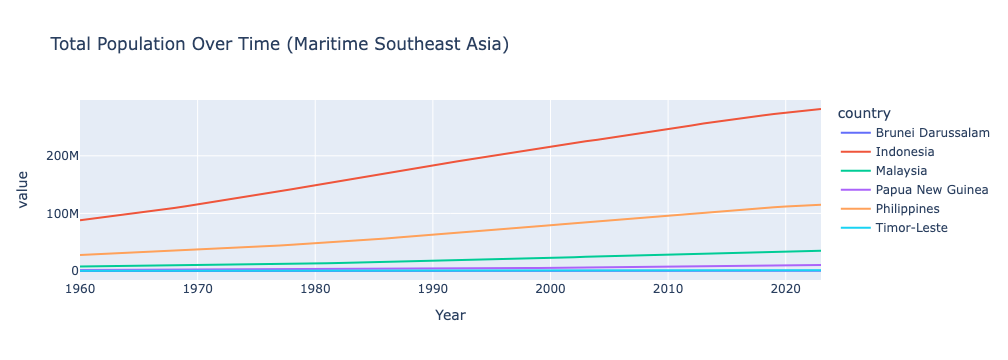

In [64]:
# Produce total population over time plot (include each country and the region)
MSEA_total = MSEA_pop["Total Population"]

MSEA_total.plot(title="Total Population Over Time (Maritime Southeast Asia)")

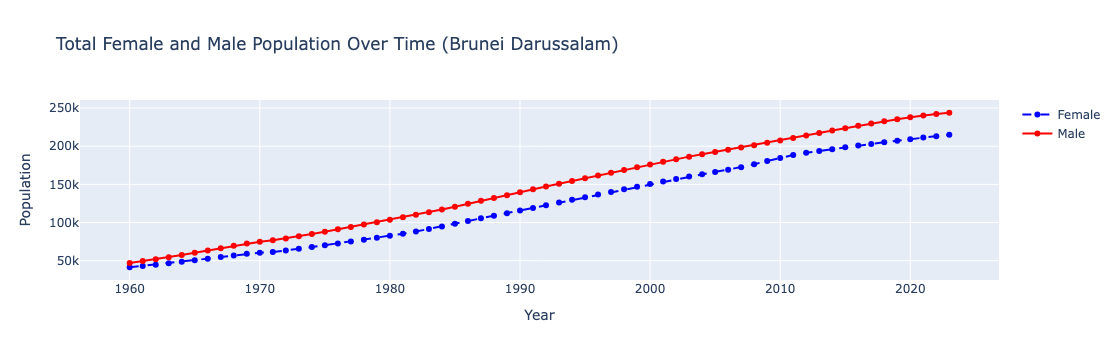

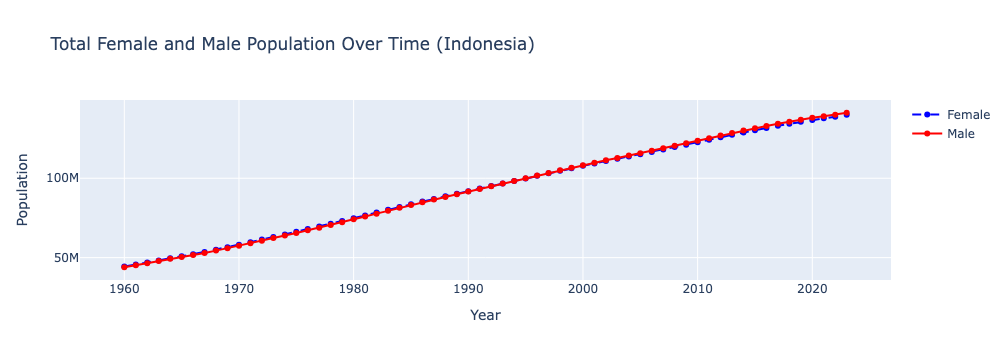

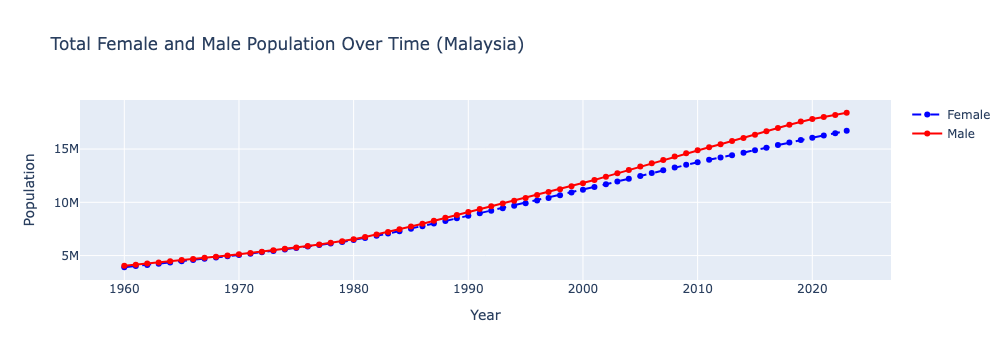

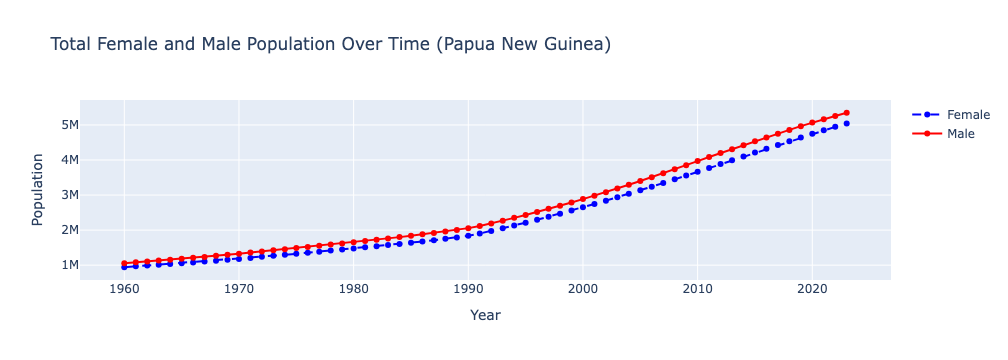

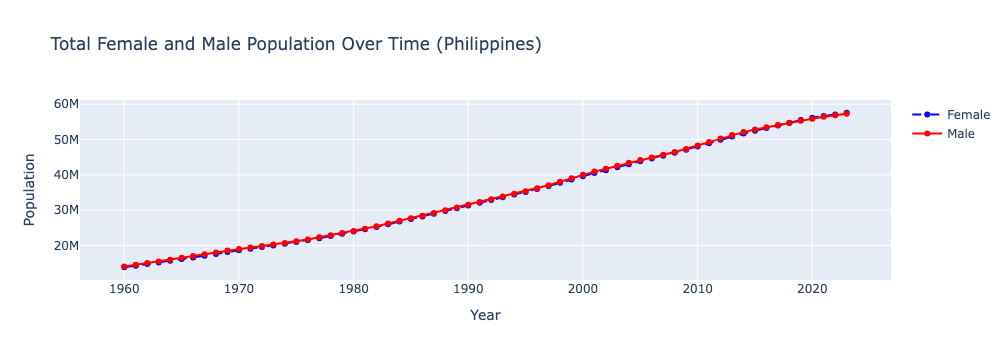

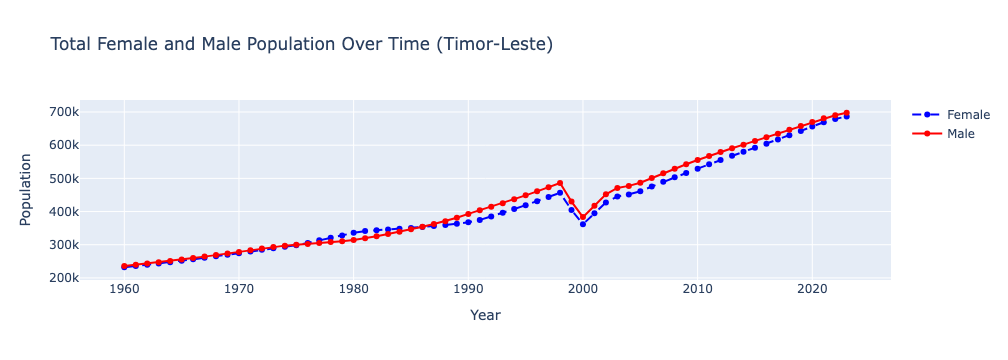

In [79]:
# Produce total female versus male populations over time for each country 

import plotly.graph_objects as go

def overlay_population(country_name, df):
    """
    Function to overlay female and male population for a given country.

    Parameters:
    - country_name (str): The name of the country whose data will be plotted.
    - df (pd.DataFrame): The DataFrame containing the population data with MultiIndex columns.

    Returns:
    - A Plotly figure with the overlayed female and male population data.
    """
    
    # Check if the country exists in the subcolumns
    if country_name not in df.columns.get_level_values('country'):
        print(f"Country '{country_name}' not found in the dataset.")
        return
    
    # Extract the female and male population data for the country
    female = df[('Total Female', country_name)]
    male = df[('Total Male', country_name)]
    
    # Create a figure
    fig = go.Figure()
    
    # Add the female population plot
    fig.add_trace(go.Scatter(x=female.index, y=female, mode='lines+markers', name='Female', line=dict(dash='dash', color='blue')))
    
    # Add the male population plot
    fig.add_trace(go.Scatter(x=male.index, y=male, mode='lines+markers', name='Male', line=dict(dash='solid', color='red')))
    
    # Add title and labels
    fig.update_layout(title=f"Total Female and Male Population Over Time ({country_name})",
                      xaxis_title="Year",
                      yaxis_title="Population")
    
    # Show the plot
    fig.show()

overlay_population("Brunei Darussalam", MSEA_pop)
overlay_population("Indonesia", MSEA_pop)
overlay_population("Malaysia", MSEA_pop)
overlay_population("Papua New Guinea", MSEA_pop)
overlay_population("Philippines", MSEA_pop)
overlay_population("Timor-Leste", MSEA_pop)

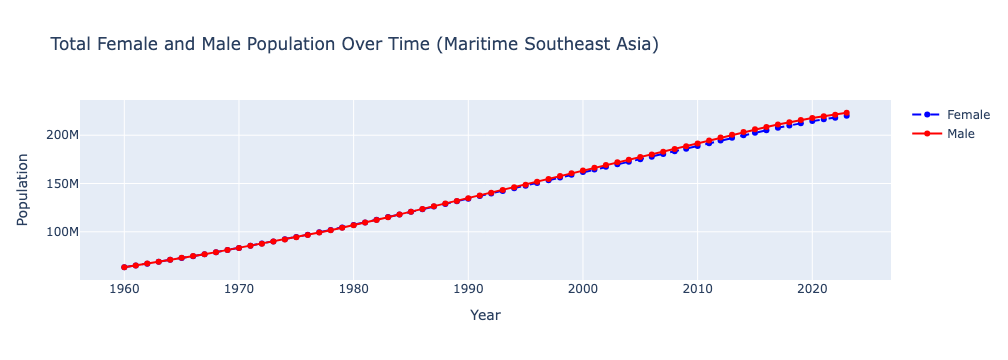

In [80]:
# Produce total female versus male populations over time for region as a whole
import plotly.graph_objects as go

def overlay_region_population(df, countries):
    """
    Function to overlay the total female and male population for the region (Maritime Southeast Asia).
    
    Parameters:
    - df (pd.DataFrame): The DataFrame containing the population data.
    - countries (list): List of country names in the region to aggregate the data.
    
    Returns:
    - A Plotly figure with the overlayed female and male population data for the region.
    """
    
    # Aggregate the female and male population across the specified countries
    female_pop_region = df["Total Female"][countries].sum(axis=1)
    male_pop_region = df["Total Male"][countries].sum(axis=1)
    
    # Create a figure
    fig = go.Figure()
    
    # Add the total female population plot
    fig.add_trace(go.Scatter(x=female_pop_region.index, y=female_pop_region, mode='lines+markers', name='Female', line=dict(dash='dash', color='blue')))
    
    # Add the total male population plot
    fig.add_trace(go.Scatter(x=male_pop_region.index, y=male_pop_region, mode='lines+markers', name='Male', line=dict(dash='solid', color='red')))
    
    # Add title and labels
    fig.update_layout(title="Total Female and Male Population Over Time (Maritime Southeast Asia)",
                      xaxis_title="Year",
                      yaxis_title="Population")
    
    # Show the plot
    fig.show()

# List of countries in Maritime Southeast Asia
countries = ["Brunei Darussalam", "Indonesia", "Malaysia", "Papua New Guinea", "Philippines", "Timor-Leste"]

# Call the function to plot total female and male population for the region
overlay_region_population(MSEA_pop, countries)


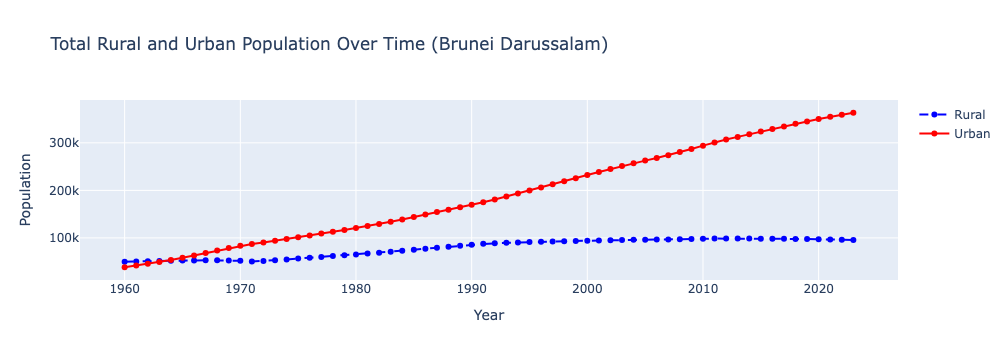

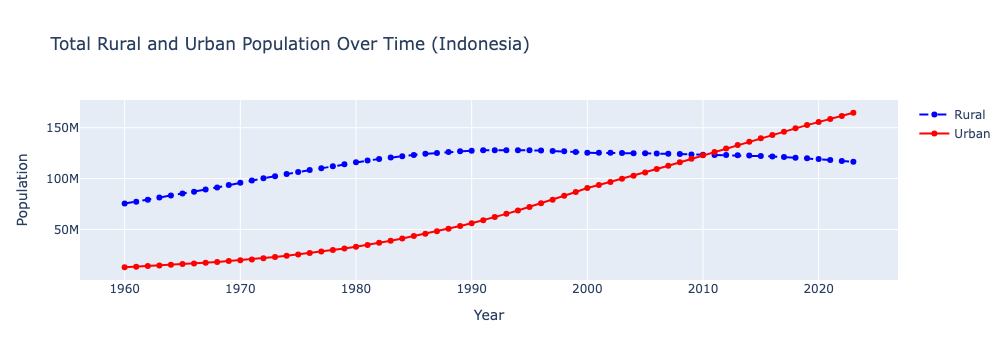

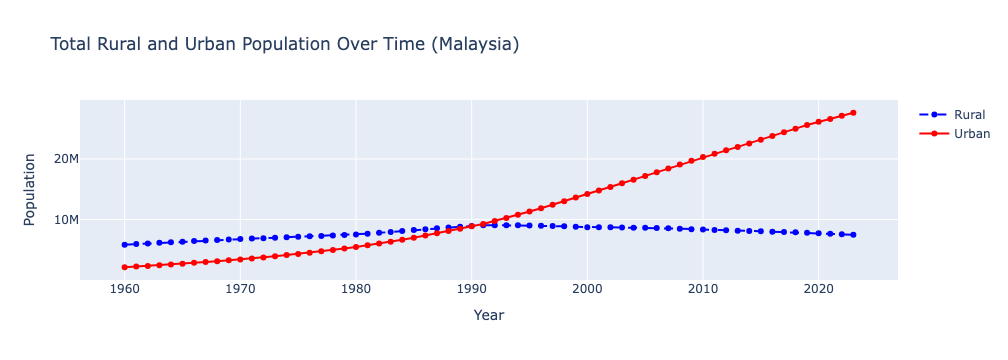

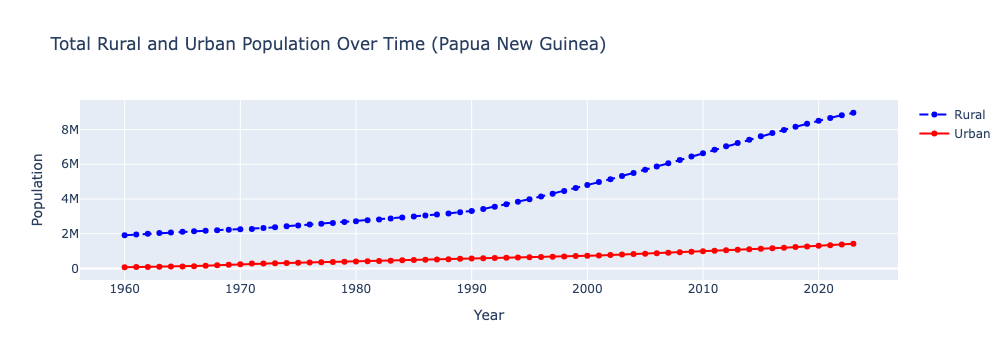

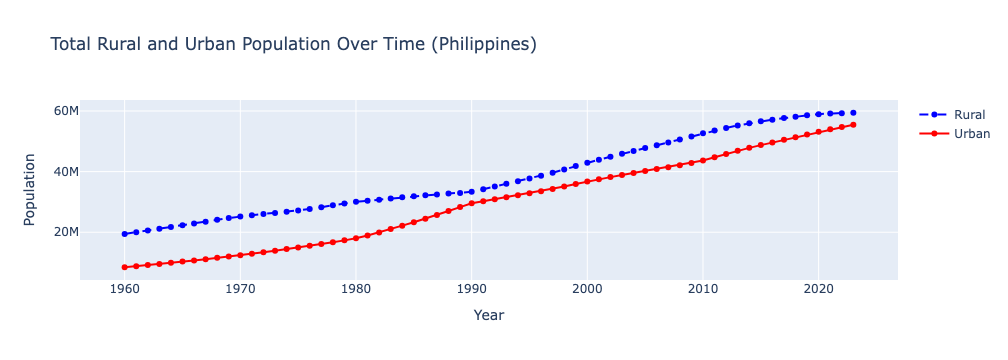

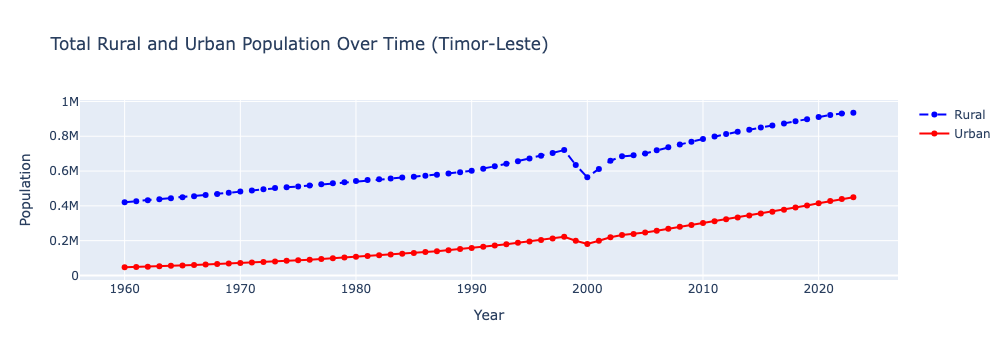

In [81]:
# Produce total rural versus urban populations over time for each country 


def overlay_population(country_name, df):
    """
    Function to overlay female and male population for a given country.

    Parameters:
    - country_name (str): The name of the country whose data will be plotted.
    - df (pd.DataFrame): The DataFrame containing the population data with MultiIndex columns.

    Returns:
    - A Plotly figure with the overlayed female and male population data.
    """
    
    # Check if the country exists in the subcolumns
    if country_name not in df.columns.get_level_values('country'):
        print(f"Country '{country_name}' not found in the dataset.")
        return
    
    # Extract the female and male population data for the country
    rural = df[('Total Rural', country_name)]
    urban = df[('Total Urban', country_name)]
    
    # Create a figure
    fig = go.Figure()
    
    # Add the female population plot
    fig.add_trace(go.Scatter(x=rural.index, y=rural, mode='lines+markers', name='Rural', line=dict(dash='dash', color='blue')))
    
    # Add the male population plot
    fig.add_trace(go.Scatter(x=urban.index, y=urban, mode='lines+markers', name='Urban', line=dict(dash='solid', color='red')))
    
    # Add title and labels
    fig.update_layout(title=f"Total Rural and Urban Population Over Time ({country_name})",
                      xaxis_title="Year",
                      yaxis_title="Population")
    
    # Show the plot
    fig.show()
    
overlay_population("Brunei Darussalam", MSEA_pop)
overlay_population("Indonesia", MSEA_pop)
overlay_population("Malaysia", MSEA_pop)
overlay_population("Papua New Guinea", MSEA_pop)
overlay_population("Philippines", MSEA_pop)
overlay_population("Timor-Leste", MSEA_pop)

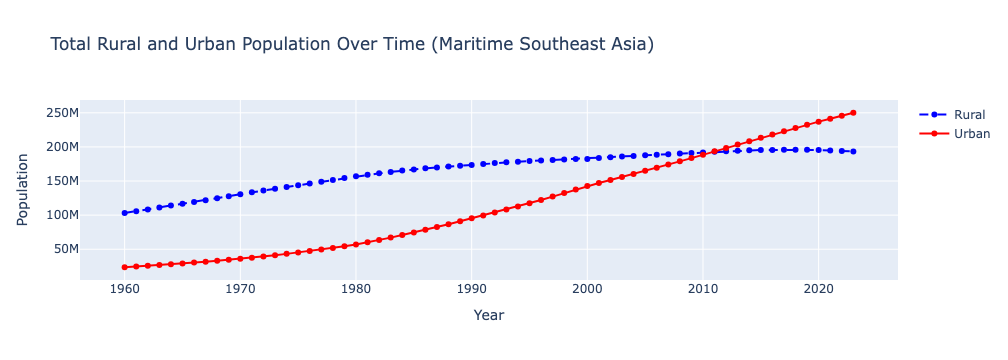

In [82]:
# Produce total rural versus urban populations over time for region as a whole
import plotly.graph_objects as go

def overlay_rural_urban_region(df):
    """
    Function to overlay total rural and urban populations for the region (Maritime Southeast Asia) as a whole.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the population data for the region.

    Returns:
    - A Plotly figure with the overlayed total rural and urban population data for the region.
    """
    # Aggregate total rural and urban populations across all countries
    rural = df['Total Rural'].sum(axis=1)
    urban = df['Total Urban'].sum(axis=1)
    
    # Create a figure
    fig = go.Figure()
    
    # Add the rural population plot
    fig.add_trace(go.Scatter(x=rural.index, y=rural, mode='lines+markers', name='Rural', line=dict(dash='dash', color='blue')))
    
    # Add the urban population plot
    fig.add_trace(go.Scatter(x=urban.index, y=urban, mode='lines+markers', name='Urban', line=dict(dash='solid', color='red')))
    
    # Add title and labels
    fig.update_layout(title="Total Rural and Urban Population Over Time (Maritime Southeast Asia)",
                      xaxis_title="Year",
                      yaxis_title="Population")
    
    # Show the plot
    fig.show()

# Call the function to overlay total rural and urban populations for the region
overlay_rural_urban_region(MSEA_pop)


## Agricultural Analysis

### Maritime Southeast Asia (Brunei Darussalam, Indonesia, Malaysia, Papua New Guinea, Philippines, Timor-Leste)

## Combined Analysis

### South Asia (Bangladesh, Bhutan, India, Maldives, Nepal, Pakistan, Sri Lanka)

In [10]:
# Overlay total population growth for each country over time with crop production index over time

In [ ]:
# Overlay total crop production index over time with agriculutral value of worker added

In [ ]:
# Add asymptotes for major technological advancements in the timeline (i.e. new fertiliser, etc.)

### Mainland Southeast Asia (Cambodia, Lao People’s Democratic Republic, Myanmar, Thailand, Viet Nam)

### Maritime Southeast Asia (Brunei Darussalam, Indonesia, Malaysia, Papua New Guinea, Philippines, Timor-Leste)

### East Asia (China, Democratic People’s Republic of Korea, Mongolia, Republic of Korea)